## KELOMPOK DATA LAB

1. Oktavian Dwi Putra
2. Muhammad Ilham
3. Maulid Uly Mada
4. Seto Bhanu Adyatma
5. Mega Pangastuti
6. Rasyidah Maulida Putri Andini
7. Raihan Damar


In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings

plt.style.use("default")
warnings.filterwarnings("ignore")

In [130]:
# Membaca database
df = pd.read_csv('https://raw.githubusercontent.com/viandwip/Employee-Attrition-Prediction-by-Using-Machine-Learning/main/Employee%20Attrition.csv')
pd.set_option('display.max_columns', 100)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## 1. Exploratory Data Analysis

### 1.1. Descriptive Statistics

In [131]:
# Membagi dataset menjadi kolom numerik dan kategorik
numerical   = df.select_dtypes(exclude = 'object')
categorical = df.select_dtypes(include = 'object')

In [132]:
# Menampilkan statistika deskriptif kolom numerik
numerical.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [133]:
# Menampilkan jumlah nilai unik pada masing-masing kolom numerik
numerical.nunique()

Age                           43
DailyRate                    886
DistanceFromHome              29
Education                      5
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobSatisfaction                4
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSinceLastPromotion       16
YearsWithCurrManager          18
dtype: int64

In [134]:
# Menampilkan statistika deskriptif kolom kategorikal
categorical.describe()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


#### Observation:
A. Semua tipe data **sudah sesuai**.<br>
B. **Tidak terdapat** kolom yang memiliki nilai kosong.<br>
C. Berdasarkan statistika deskriptif di atas, dapat disimpulkan bahwa: <ul>
  <li>Kolom numerik seperti `DistanceFromHome`, `MonthlyIncome`, `NumCompaniesWorked`, `PercentSalaryHike`, `TotalWorkingYears`, `YearsAtCompany`, `YearsInCurrentRole`, `YearsSinceLastPromotion`, dan `YearsWithCurrManager` sepertinya memiliki distribusi **skew ke kanan**, jika dilihat dari nilai mean yang jauh lebih besar dari nilai mediannya.
  <li>Pada kolom `DailyRate`, `EmployeeNumber`, `MonthlyIncome`, `MonthlyRate`, `TotalWorkingYears`, `YearsAtCompany` terdapat indikasi adanya **outlier** yang ditunjukkan dari **nilai max**-nya yang berbeda jauh jika dibandingkan dengan nilai lainnya.</li>
  <li>Kolom `EmployeeCount`, `StandardHours`,  `Over18` perlu di-*drop*, karena hanya memiliki **1 nilai unik**. Sedangkan kolom `EmployeeNumber`, juga perlu di-*drop*, karena memiliki nilai unik yang jumlahnya **sama dengan jumlah baris** yang ada.</li>
  </ul>

### 1.2. Univariate Analysis

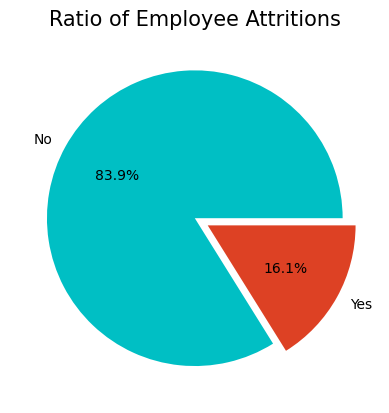

In [135]:
# Membuat pie chart
plt.pie(x = df['Attrition'].value_counts(), labels = ['No', 'Yes'], autopct = '%.1f%%',
        colors = ['#00bfc4', '#dd4124'], explode = [0, 0.1])

#Menambahkan judul
plt.title('Ratio of Employee Attritions', fontsize = 15)

#Menampilkan plot
plt.show()

Berdasarkan ilustrasi di atas, dapat disimpulkan bahwa **16.1%** dari total karyawan memilih untuk **keluar** dari perusahaan sedangkan **83.9%** dari total karyawan memilih untuk **bertahan**.

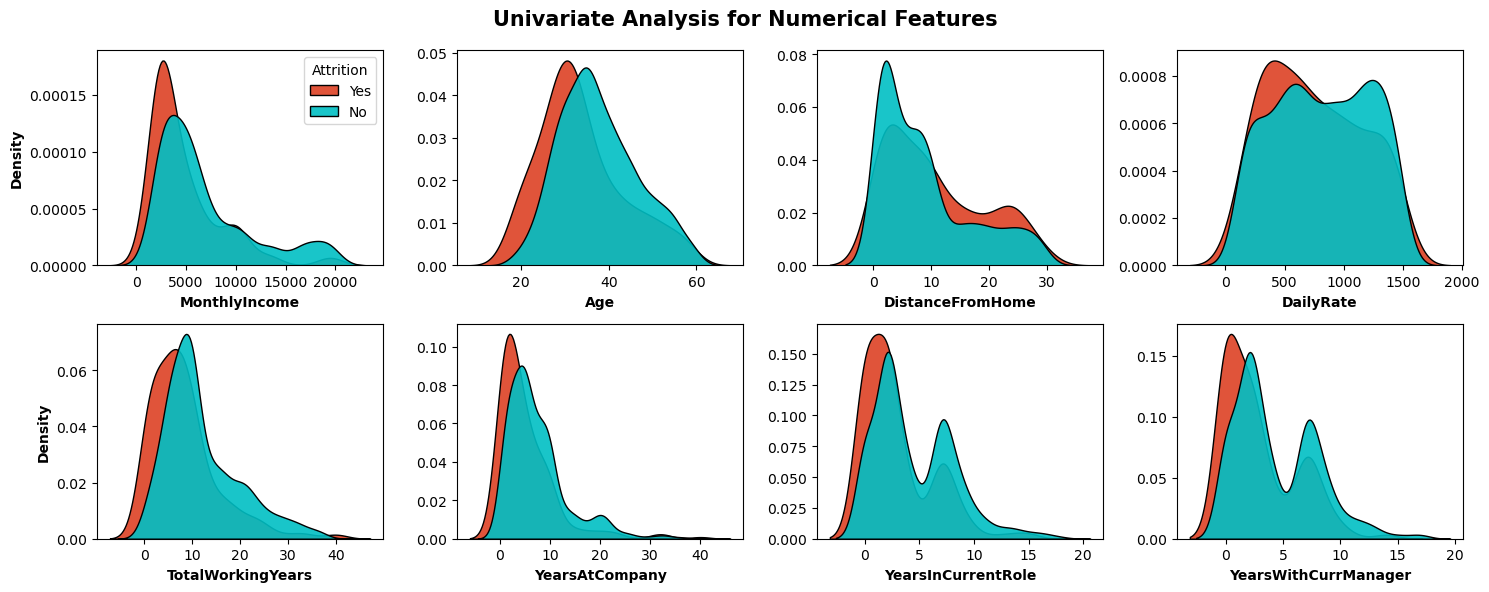

In [136]:
# Membuat list num_columns
num_columns =  ['MonthlyIncome', 'Age', 'DistanceFromHome', 'DailyRate', 'TotalWorkingYears', 
                'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager']

# Mengatur ukuran gambar
fig, ax = plt.subplots(2, 4, figsize = (15,6))

# Membuat kdeplot
for i, col in enumerate(num_columns):
  ax1 = sns.kdeplot(x = df[df['Attrition'] == 'Yes'][col], fill = True, label = 'Yes', color = '#dd4124', edgecolor = 'black', linewidth = 1, alpha = 0.9, ax = ax[i//4, i%4])
  ax2 = sns.kdeplot(x = df[df['Attrition'] == 'No'][col], fill = True, label = 'No', color = '#00bfc4', edgecolor = 'black', linewidth = 1, alpha = 0.9, ax = ax[i//4, i%4])
  
  # Mengatur x label
  ax1.set_xlabel(col, fontweight = 'bold')
  
  # Mengatur y label
  if i in [0, 4]:
    ax1.set_ylabel('Density', fontweight = 'bold')
  else:  
    ax1.set_ylabel('')
  
  # Menambah legend
  if i == 0:
    ax1.legend(title = 'Attrition')
    

    
# Menambah judul
plt.suptitle('Univariate Analysis for Numerical Features', fontsize = 15, fontweight = 'bold')
  
# Menampilkan grafik
plt.tight_layout()
plt.show()

#### Observation:
- Karyawan dengan `Monthly Income` sekitar 1800 - 3200 merupakan tipe karyawan yang memiliki *Attrition Rate* yang paling tinggi. Kemudian karyawan dengan `Monthly Income` sekitar 13000 - 19000 merupakan tipe karyawan yang memiliki *Attrition Rate* yang paling rendah.
- Karyawan dengan rentang umur di bawah 40 tahun cenderung memiliki *Attrition Rate* yang lebih tinggi. Kemudian, karyawan dengan rentang umur sekitar 25 - 35 tahun memiliki *Attrition rate* yang paling tinggi.
- Karyawan dengan nilai `Distance From Home` lebih dari 10 km cenderung memiliki *Attrition Rate* yang lebih tinggi.
- Karyawan dengan nilai `Daily Rate` kurang dari 800 cenderung memiliki *Attrition Rate* yang lebih tinggi.
- Karyawan dengan nilai `Total Working Years` sekitar 0 - 2 tahun serta 4,5 - 6 tahun merupakan dua tipe karyawan yang memiliki *Attrition Rate* yang paling tinggi.
- Karyawan dengan nilai `Years at Company`, `Years in Current`, and `Years with Current Manager` sekitar 0 - 1 tahun tipe karyawan yang memiliki *Attrition Rate* yang paling tinggi.

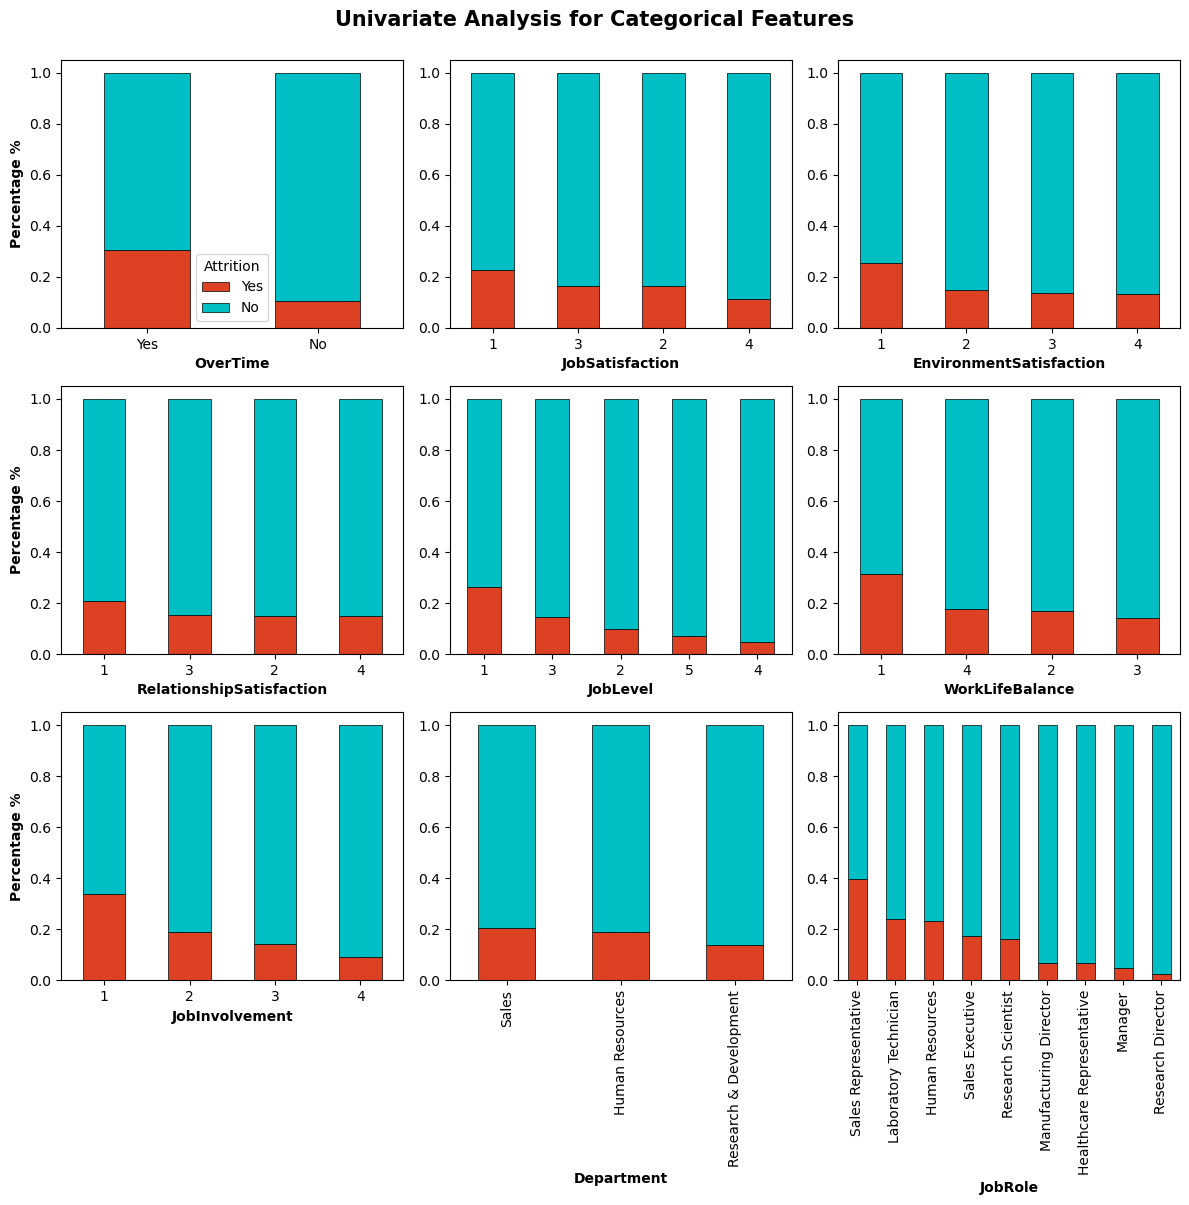

In [137]:
# Membuat list cat_columns
cat_columns = ['OverTime', 'JobSatisfaction','EnvironmentSatisfaction', 'RelationshipSatisfaction',
               'JobLevel', 'WorkLifeBalance', 'JobInvolvement', 'Department', 'JobRole']

# Membuat subplots
fig, ax = plt.subplots(3,3, figsize = (12, 12))

# Menghitung proporsi attrition untuk list cat_columns
for i, col in enumerate(cat_columns):
  df_cat = df.groupby(cat_columns[i])['Attrition'].value_counts(normalize = True).unstack()
  df_cat = df_cat[['Yes', 'No']]
  df_cat = df_cat.sort_values('Yes', ascending = False)

  # Membuat barchart
  ax1 = df_cat.plot.bar(stacked=True, color=['#dd4124', '#00bfc4'], edgecolor = 'black', linewidth = 0.5, ax = ax[i//3, i%3])
  
  # Mengatur x label
  ax1.set_xlabel(col, fontweight = 'bold')
  
  # Mengatur y label
  if i in [0,3,6]:
    ax1.set_ylabel('Percentage %', fontweight = 'bold')
  
  # Mengatur x ticks
  if i in [7,8]:
    ax1.set_xticklabels(df_cat.index, rotation = 90)
  else:
    ax1.set_xticklabels(df_cat.index, rotation = 0)
    
  if i != 0:
    ax1.get_legend().remove()

# Menambah judul
plt.suptitle('Univariate Analysis for Categorical Features', fontsize = 15, fontweight = 'bold', y = 1)

# Menampilkan grafik
plt.tight_layout()
plt.show()

#### Observation:
- Karyawan yang bekerja melebihi jam kerja reguler (`over time`) memiliki *Attrition Rate* yang lebih tinggi dibandingkan dengan karyawan yang tidak bekerja lembur.
- Karyawan yang memiliki tingkat `Job Satisfaction`, `Environment Satisfaction`, `Relationship Satisfaction`, `JobLevel`, `Work Life Balance`, dan `JobInvolvement` yang lebih rendah cenderung memiliki *Attrition Rate* yang lebih tinggi dan yang bernilai 1 merupakan tipe karyawan yang memiliki *Attrition Rate* yang paling tinggi.
- Karyawan yang bekerja pada Departemen `Sales` memiliki *Attrition Rate* yang paling tinggi dibandingkan dengan departemen lainnya.
- Karyawan yang menjabat sebagai `Sales Representative`, `Laboratory Technician`, dan `Human Resources` merupakan 3 tipe karyawan yang memiliki *Attrition rate* paling tinggi.

### 1.3. Bivariate Analysis

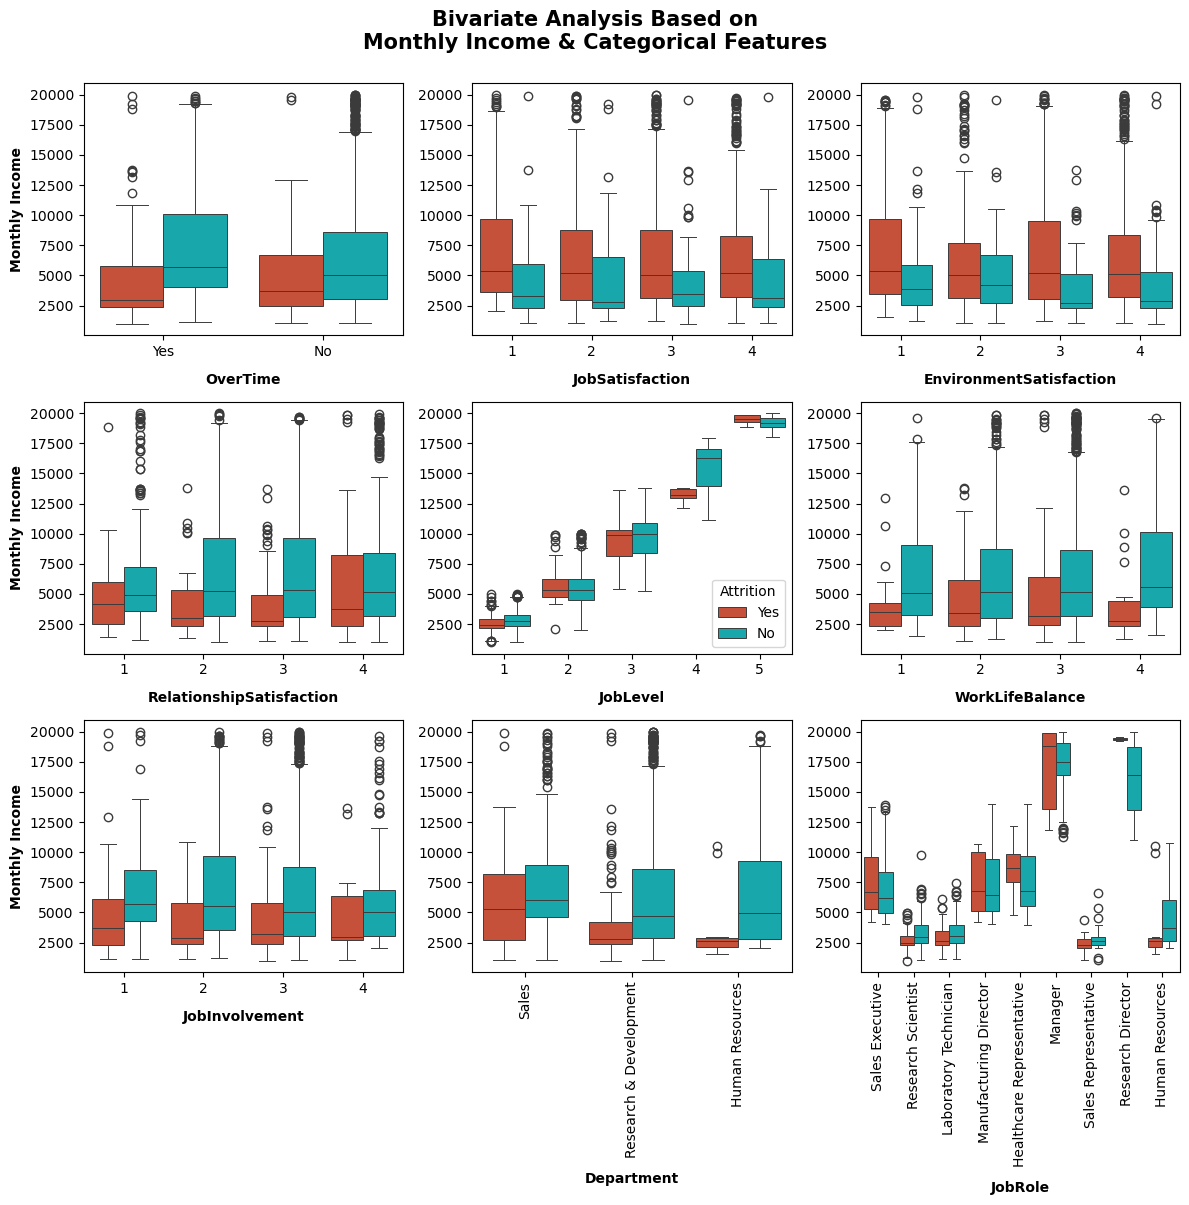

In [138]:
# Adjust image size
plt.figure(figsize=(12, 12))

# Custom palette
palette = ['#dd4124', '#00bfc4']

# Create a boxplot
for i in range(9):
    plt.subplot(3, 3, i+1)
    ax1 = sns.boxplot(x = cat_columns[i], y = "MonthlyIncome", data = df, hue = 'Attrition', palette = palette, linewidth = 0.7)
    
    # Adjust x label
    ax1.set_xlabel(cat_columns[i], fontsize = 10, fontweight = 'bold', labelpad = 10)
    
    # Adjust y label
    if i in [0, 3, 6]:
      ax1.set_ylabel('Monthly Income', fontsize = 10, fontweight = 'bold')
    else:
      ax1.set_ylabel('')
    
    # Adjust xticks
    if i in [7, 8]:
      ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 90)
    
    # Add legend
    if i == 4:
      ax1.legend(title='Attrition', loc='lower right')
    else:
      ax1.get_legend().remove()
      
# Menambah judul
plt.suptitle('Bivariate Analysis Based on\nMonthly Income & Categorical Features', fontweight='bold', fontsize=15, y=1)

# Show the graph
plt.tight_layout()
plt.show()

Dari grafik di atas yang menunjukkan hubungan `MonthlyIncome` dengan fitur lain (`OverTime`, `JobSatisfaction`,`EnvironmentSatisfaction`, `RelationshipSatisfaction`, `JobLevel`, `WorkLifeBalance`, `JobInvolvement`, `Department`, `JobRole`) dapat disimpulkan bahwa karyawan dengan pendapatan bulanan (`Monthly Income`) yang **lebih rendah** cenderung memiliki *Attrition Rate* yang lebih tinggi atau kecenderungan untuk meninggalkan perusahaan lebih besar.

## 2. Data Preprocessing

### 2.1. Handle Missing Value

In [139]:
# Menampilkan informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [140]:
print("Jumlah nilai kosong pada masing-masing kolom :")
df.isna().sum()

Jumlah nilai kosong pada masing-masing kolom :


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Berdasarkan informasi di atas didapatkan bahwa **tidak terdapat missing value** pada semua kolom yang ada sehingga tidak diperlukan proses penghapusan *missing values*.

### 2.2. Handle Duplicated Data

In [141]:
# Menampilkan jumlah data duplicate
print("Jumlah data duplikat :")
df.duplicated().sum()

Jumlah data duplikat :


0

Berdasarkan informasi di atas didapatkan bahwa **tidak terdapat data yang terduplikasi** sehingga tidak diperlukan proses penghapusan *duplicated data*.

### 2.3. Handle Outliers

In [142]:
# Menghapus outlier
from scipy import stats

print(f'Jumlah baris sebelum dilakukan penghapusan data outliers : {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in ['MonthlyIncome', 'NumCompaniesWorked', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']:
    zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya

df = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah dilakukan penghapusan data outliers : {len(df)}')

Jumlah baris sebelum dilakukan penghapusan data outliers : 1470
Jumlah baris setelah dilakukan penghapusan data outliers : 1387


- Dilakukan proses penghapusan data outliers pada kolom `MonthlyIncome`, `NumCompaniesWorked`, `TotalWorkingYears`, `TrainingTimesLastYear`, `YearsAtCompany`, `YearsInCurrentRole`, `YearsSinceLastPromotion`, dan `YearsWithCurrManager`.<br>
- Berdasarkan informasi di atas, didapatkan bahwa sebelum dilakukan penghapusan data *outliers* terdapat **1470** baris data dan setelah dilakukan penghapusan data *outliers* terdapat **1387** baris data.

### 2.4. Feature Encoding

In [143]:
# Membuat map
BusinessTravel_map = {'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2}

# Melakukan label encoding pada kolom bertipe kategorik
df['Attrition'] = LabelEncoder().fit_transform(df['Attrition'])
df['BusinessTravel'] = df['BusinessTravel'].map(BusinessTravel_map)
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
df['OverTime'] = LabelEncoder().fit_transform(df['OverTime'])

# Menampilkan data setelah dilakukan proses label encoding
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,Sales,1,2,Life Sciences,1,1,2,0,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,2,279,Research & Development,8,1,Life Sciences,1,2,3,1,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,1,1373,Research & Development,2,2,Other,1,4,4,1,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,1,15,3,2,80,0,7,3,3,0,0,0,0


In [144]:
# Melakukan one-hot encoding kolom kategorik
for cat in categorical:
  if cat not in ['Attrition', 'BusinessTravel', 'Gender', 'OverTime', 'Over18']:
    df1 = pd.get_dummies(df[cat], prefix=cat)
    df  = df.drop(cat, axis = 1)
    df  = df.join(df1)

# Menampilkan data setelah dilakukan proses one-hot encoding
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1,1102,1,2,1,1,2,0,94,3,2,4,5993,19479,8,Y,1,11,3,1,80,0,8,0,1,6,4,0,5,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,0,2,279,8,1,1,2,3,1,61,2,2,2,5130,24907,1,Y,0,23,4,4,80,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,37,1,1,1373,2,2,1,4,4,1,92,2,1,3,2090,2396,6,Y,1,15,3,2,80,0,7,3,3,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1


In [145]:
# Menampilkan informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1387 entries, 0 to 1469
Data columns (total 52 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Age                                1387 non-null   int64 
 1   Attrition                          1387 non-null   int32 
 2   BusinessTravel                     1387 non-null   int64 
 3   DailyRate                          1387 non-null   int64 
 4   DistanceFromHome                   1387 non-null   int64 
 5   Education                          1387 non-null   int64 
 6   EmployeeCount                      1387 non-null   int64 
 7   EmployeeNumber                     1387 non-null   int64 
 8   EnvironmentSatisfaction            1387 non-null   int64 
 9   Gender                             1387 non-null   int32 
 10  HourlyRate                         1387 non-null   int64 
 11  JobInvolvement                     1387 non-null   int64 
 12  JobLev

### 2.5. Feature Selection

In [146]:
# Melakukan penghapusan kolom dengan nilai unik 1 dan nilai unik yang sama dengan jumlah baris
df_new = df.drop(columns = ['EmployeeNumber', 'EmployeeCount', 'StandardHours', 'Over18'])
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1387 entries, 0 to 1469
Data columns (total 48 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1387 non-null   int64
 1   Attrition                          1387 non-null   int32
 2   BusinessTravel                     1387 non-null   int64
 3   DailyRate                          1387 non-null   int64
 4   DistanceFromHome                   1387 non-null   int64
 5   Education                          1387 non-null   int64
 6   EnvironmentSatisfaction            1387 non-null   int64
 7   Gender                             1387 non-null   int32
 8   HourlyRate                         1387 non-null   int64
 9   JobInvolvement                     1387 non-null   int64
 10  JobLevel                           1387 non-null   int64
 11  JobSatisfaction                    1387 non-null   int64
 12  MonthlyIncome       

In [147]:
# Menghilangkan kolom yang memiliki nilai korelasi rendah terhadap target (korelasi dibawah 0.05)
# Kolom target yang akan digunakan sebagai referensi
target_column = 'Attrition'

# Hitung korelasi terhadap kolom target
correlation_with_target = df_new.corr()[target_column].drop(target_column)

# Hilangkan kolom-kolom dengan korelasi di bawah 0.05 terhadap kolom target
threshold = 0.05
columns_to_drop = correlation_with_target[abs(correlation_with_target) < threshold].index
data_filtered = df_new.drop(columns=columns_to_drop)

In [148]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1387 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1387 non-null   int64
 1   Attrition                          1387 non-null   int32
 2   BusinessTravel                     1387 non-null   int64
 3   DailyRate                          1387 non-null   int64
 4   DistanceFromHome                   1387 non-null   int64
 5   EnvironmentSatisfaction            1387 non-null   int64
 6   JobInvolvement                     1387 non-null   int64
 7   JobLevel                           1387 non-null   int64
 8   JobSatisfaction                    1387 non-null   int64
 9   MonthlyIncome                      1387 non-null   int64
 10  NumCompaniesWorked                 1387 non-null   int64
 11  OverTime                           1387 non-null   int32
 12  RelationshipSatisfac

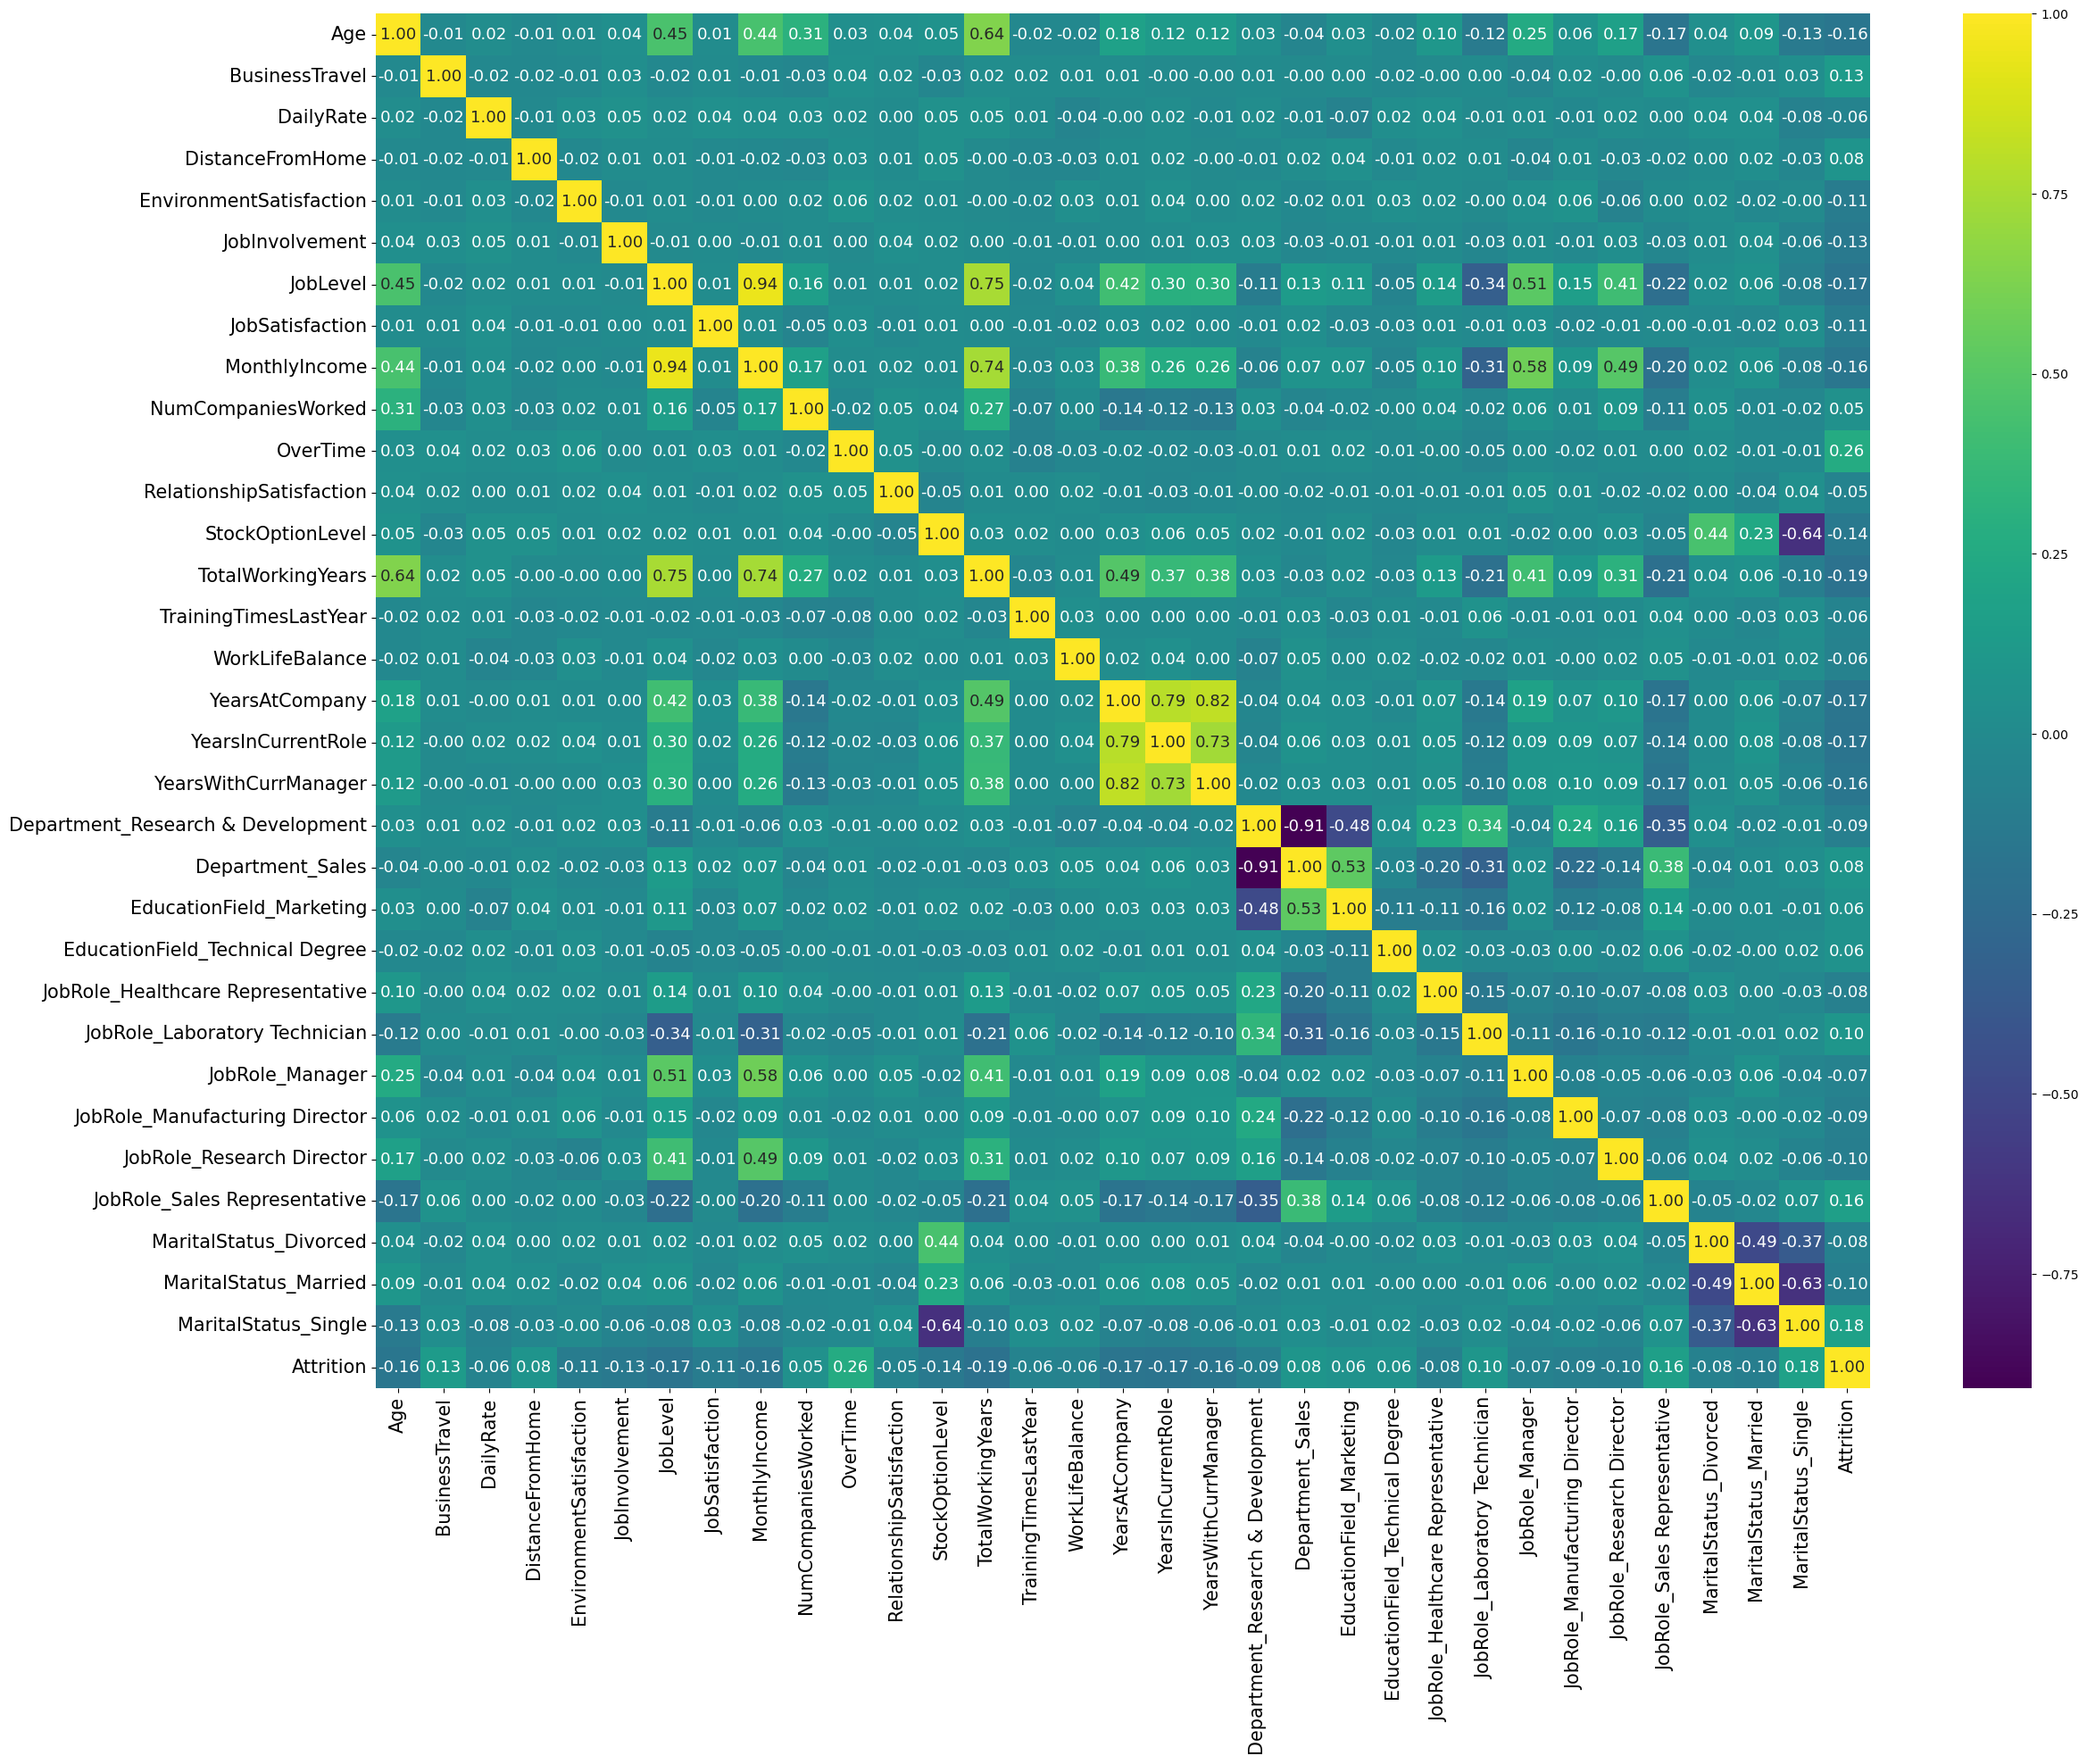

In [149]:
# Meletakkan kolom Attrition di urutan terakhir
data_filtered = data_filtered.drop('Attrition', axis=1)
data_filtered['Attrition'] = df_new['Attrition']

# Buat dan tampilkan heatmap
plt.figure(figsize=(27, 20))
sns.heatmap(data_filtered.corr(), cmap='viridis', annot=True, fmt=".2f", annot_kws={"size": 13})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

Terdapat **multicollinearity** atau korelasi yang memiliki nilai di atas 0.7 antara kolom `JobLevel`, `MonthlyIncome` dan `TotalWorkingYears` serta kolom `YearsAtCompany`, `YearsInCurrentRole` dan `YearsWithCurrManager` sehingga kita bisa memilih salah satu saja.

In [150]:
data_filtered = data_filtered.drop(['JobLevel', 'MonthlyIncome', 'YearsAtCompany', 'YearsWithCurrManager'], axis = 1)
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1387 entries, 0 to 1469
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1387 non-null   int64
 1   BusinessTravel                     1387 non-null   int64
 2   DailyRate                          1387 non-null   int64
 3   DistanceFromHome                   1387 non-null   int64
 4   EnvironmentSatisfaction            1387 non-null   int64
 5   JobInvolvement                     1387 non-null   int64
 6   JobSatisfaction                    1387 non-null   int64
 7   NumCompaniesWorked                 1387 non-null   int64
 8   OverTime                           1387 non-null   int32
 9   RelationshipSatisfaction           1387 non-null   int64
 10  StockOptionLevel                   1387 non-null   int64
 11  TotalWorkingYears                  1387 non-null   int64
 12  TrainingTimesLastYea

### 2.6. Feature Engineering

In [151]:
# Menghapus kolom Attrition
data_filtered = data_filtered.drop('Attrition', axis = 1)

# Membuat fitur baru
data_filtered['EmployeeSatisfaction'] = ( df_new['EnvironmentSatisfaction'] + df_new['JobSatisfaction'] + df_new['RelationshipSatisfaction'] ) / 3
data_filtered['IncomeTotalYears'] = df_new['MonthlyIncome']*df_new['TotalWorkingYears']
data_filtered['JobLevelSatisfaction'] = df_new['JobLevel'] * df_new['JobSatisfaction']
data_filtered['YearsInCurrentRole_JobSatisfaction'] = df_new['YearsInCurrentRole'] * df_new['JobSatisfaction']
data_filtered['StockOption_JobSatisfaction'] = df_new['StockOptionLevel'] * df_new['JobSatisfaction']

# Menambahkan kolom Attrition
data_filtered['Attrition'] = df_new['Attrition']

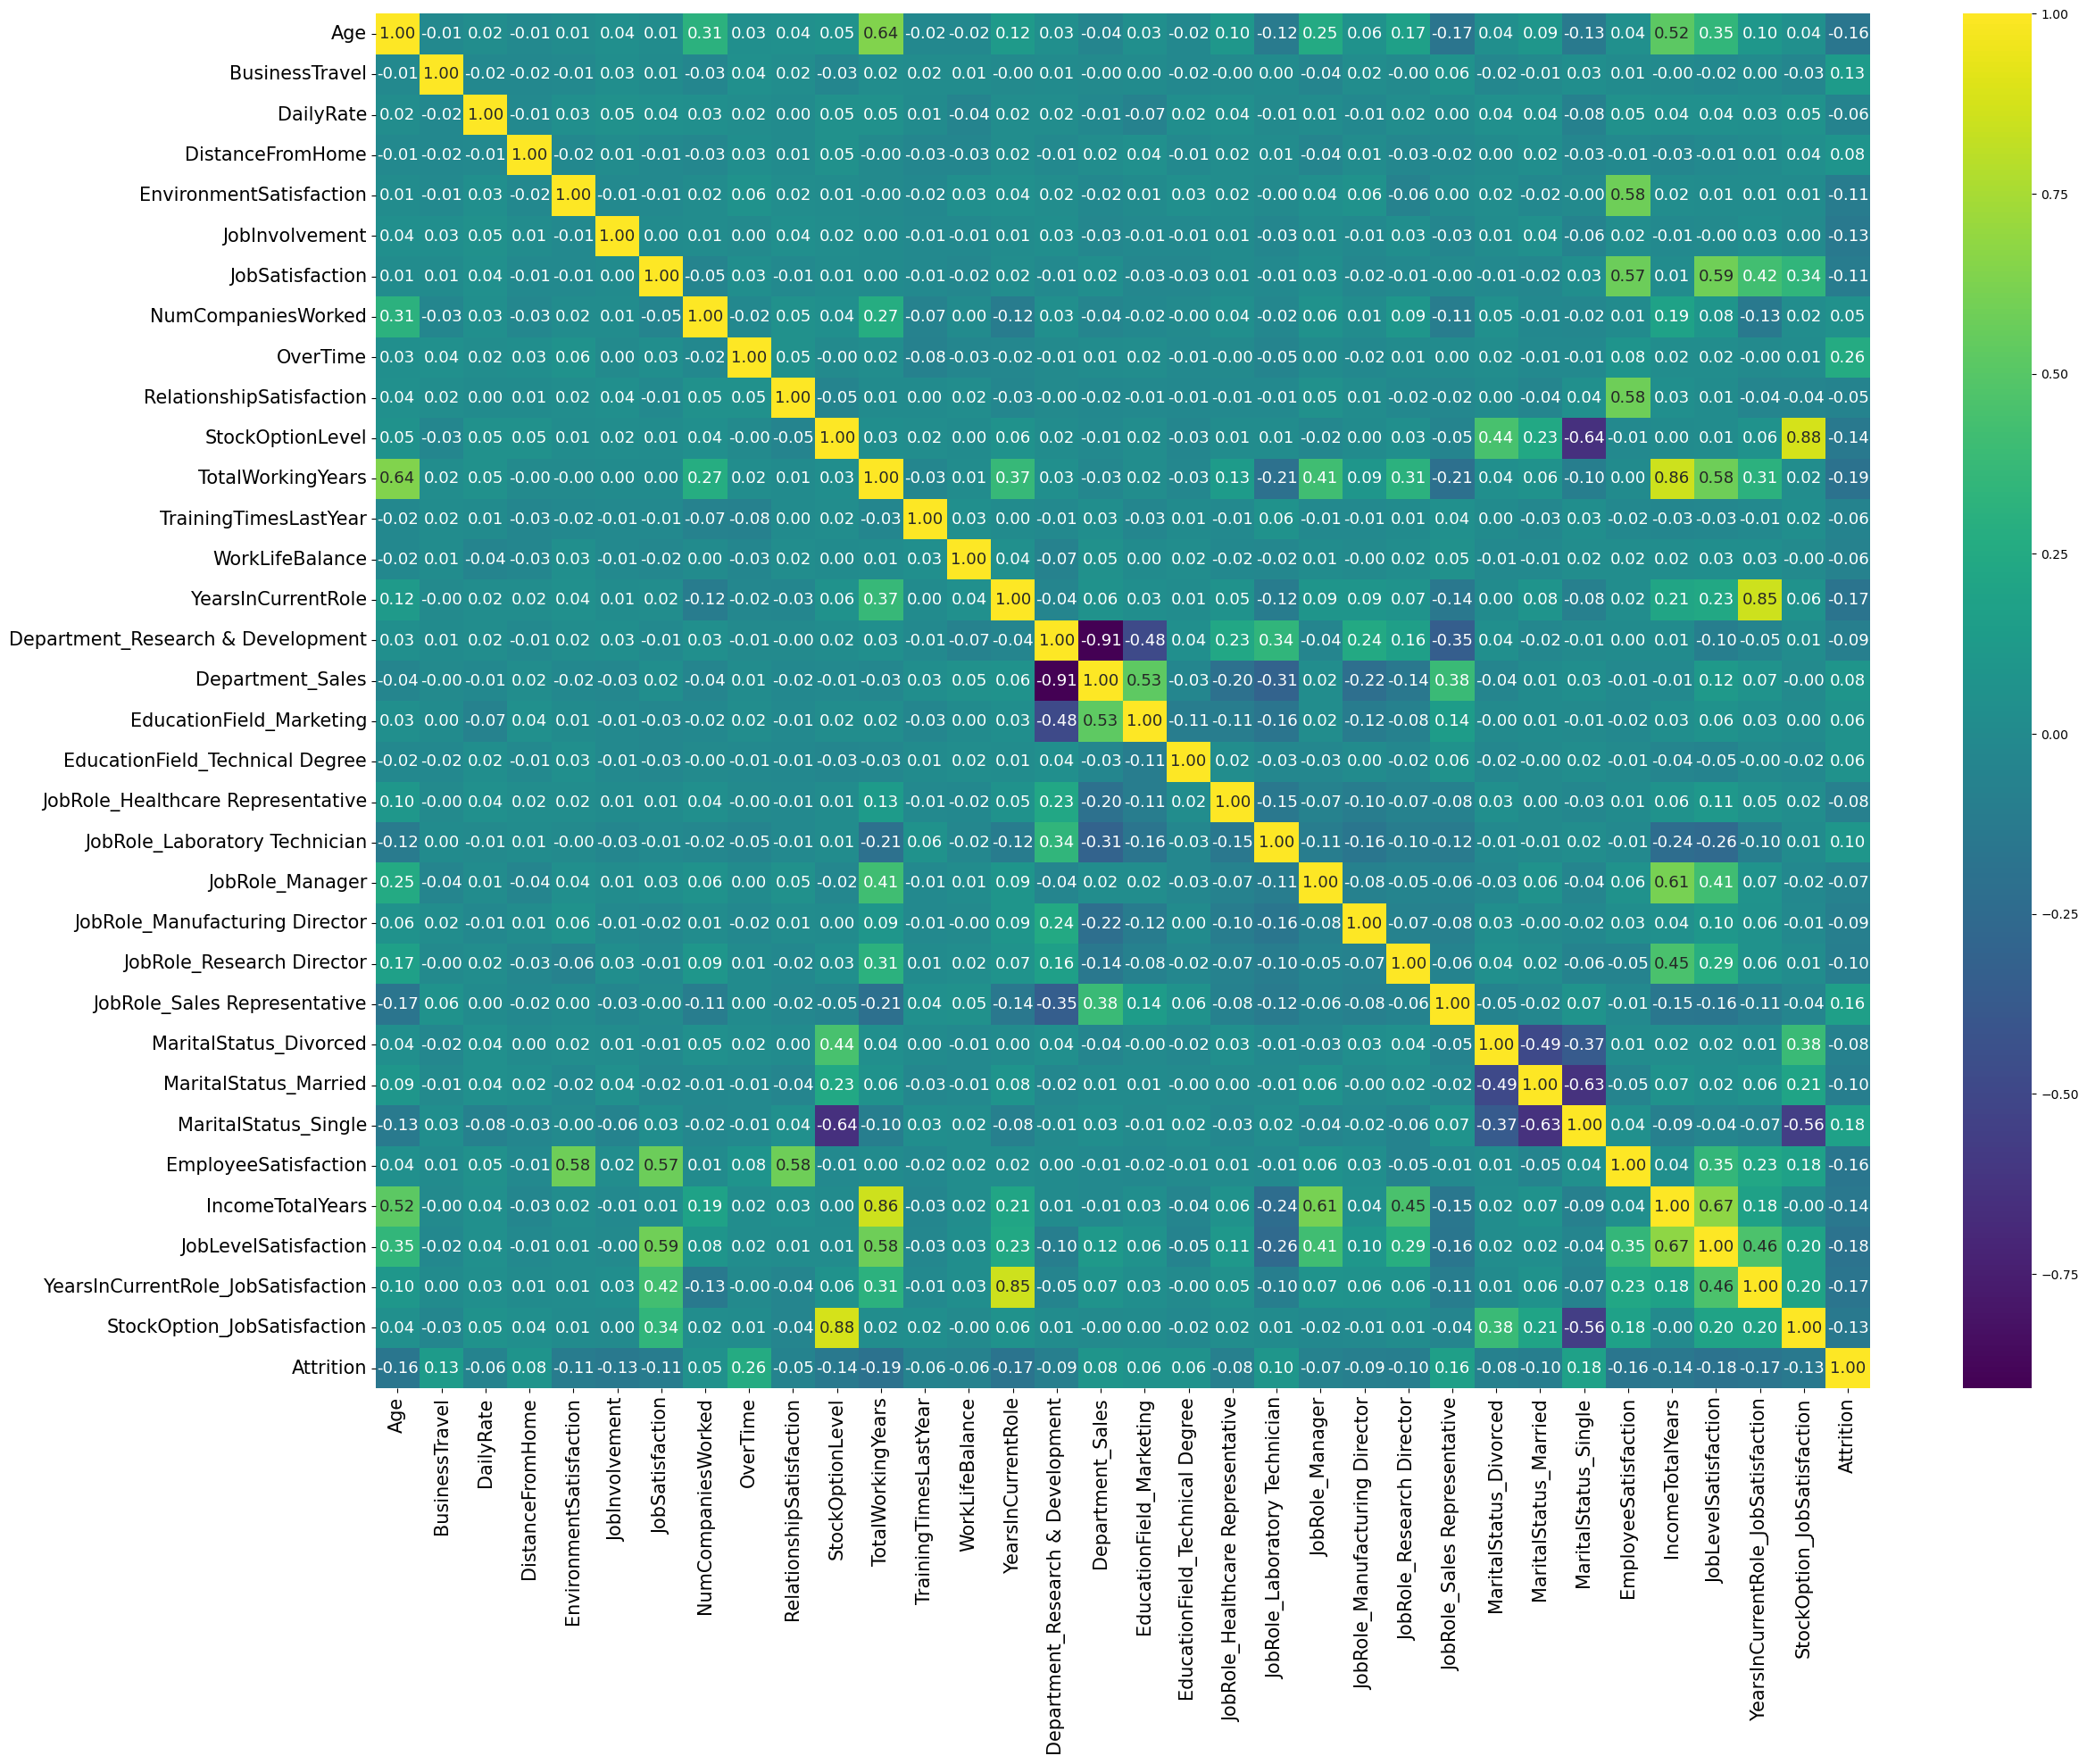

In [152]:
# Buat dan tampilkan heatmap
plt.figure(figsize=(27, 20))
sns.heatmap(data_filtered.corr(), cmap='viridis', annot=True, fmt=".2f", annot_kws={"size": 13})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [153]:
# Menghapus kolom yang memiliki korelasi lebih rendah dengan target
data_baru = data_filtered.drop(columns = ['EnvironmentSatisfaction', 'JobSatisfaction',
                                          'RelationshipSatisfaction', 'IncomeTotalYears',
                                          'YearsInCurrentRole_JobSatisfaction', 'StockOption_JobSatisfaction'])

In [154]:
# Menampilkan data baru
data_baru.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1387 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1387 non-null   int64  
 1   BusinessTravel                     1387 non-null   int64  
 2   DailyRate                          1387 non-null   int64  
 3   DistanceFromHome                   1387 non-null   int64  
 4   JobInvolvement                     1387 non-null   int64  
 5   NumCompaniesWorked                 1387 non-null   int64  
 6   OverTime                           1387 non-null   int32  
 7   StockOptionLevel                   1387 non-null   int64  
 8   TotalWorkingYears                  1387 non-null   int64  
 9   TrainingTimesLastYear              1387 non-null   int64  
 10  WorkLifeBalance                    1387 non-null   int64  
 11  YearsInCurrentRole                 1387 non-null   int64

### 2.7. Standardization

In [155]:
# Import library
from sklearn.preprocessing import StandardScaler

# Membuat variabel numerical_new
numerical_new   = ['Age', 'DailyRate', 'DistanceFromHome', 'JobInvolvement', 'NumCompaniesWorked',
                   'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
                   'YearsInCurrentRole', 'EmployeeSatisfaction', 'JobLevelSatisfaction']
 
# Melakukan proses scaling
for num in numerical_new:
    data_baru[num] = StandardScaler().fit_transform(data_baru[num].values.reshape(len(df), 1))

In [156]:
# Menampilkan data setelah dilakukan proses scaling
data_baru.describe()

,Age,BusinessTravel,DailyRate,DistanceFromHome,JobInvolvement,NumCompaniesWorked,OverTime,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,Department_Research & Development,Department_Sales,EducationField_Marketing,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,EmployeeSatisfaction,JobLevelSatisfaction,Attrition
count,1.387000e+03,1387.000000,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1387.000000,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1.387000e+03,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1.387000e+03,1.387000e+03,1387.000000
mean,-3.201797e-16,1.086518,-3.073725e-17,-7.684312e-18,-1.511248e-16,1.018171e-16,0.284787,4.098300e-17,-8.452743e-17,1.793006e-17,1.562477e-16,5.122875e-18,0.655371,0.302812,0.107426,0.091565,0.087960,0.183129,0.049748,0.100216,0.046143,0.059841,0.219178,0.458544,0.322278,-8.708887e-17,-9.733462e-17,0.165105
std,1.000361e+00,0.534265,1.000361e+00,1.000361e+00,1.000361e+00,1.000361e+00,0.451476,1.000361e+00,1.000361e+00,1.000361e+00,1.000361e+00,1.000361e+00,0.475418,0.459640,0.309766,0.288514,0.283338,0.386912,0.217502,0.300396,0.209870,0.237278,0.413839,0.498458,0.467517,1.000361e+00,1.000361e+00,0.371409
min,-2.066430e+00,0.000000,-1.746955e+00,-1.011249e+00,-2.444483e+00,-1.072199e+00,0.000000,-9.294273e-01,-1.538219e+00,-2.171420e+00,-2.501172e+00,-1.192419e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.740140e+00,-1.172920e+00,0.000000
25%,-7.082852e-01,1.000000,-8.400474e-01,-8.875735e-01,-1.034126e+00,-6.724300e-01,0.000000,-9.294273e-01,-6.423508e-01,-6.225595e-01,-1.082307e+00,-5.757580e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.201712e-01,-6.371585e-01,0.000000
50%,-1.423914e-01,1.000000,2.347108e-03,-2.691967e-01,3.762308e-01,-2.726613e-01,0.000000,2.382499e-01,-1.944169e-01,1.518710e-01,3.365585e-01,-2.674274e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.017893e-02,-3.692777e-01,0.000000
75%,6.498599e-01,1.000000,8.782389e-01,5.965307e-01,3.762308e-01,5.268762e-01,1.000000,2.382499e-01,4.028283e-01,1.518710e-01,3.365585e-01,9.658952e-01,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,9.698056e-01,7.022456e-01,0.000000
max,2.687077e+00,2.000000,1.716911e+00,2.451661e+00,1.786588e+00,2.525720e+00,1.000000,2.573604e+00,3.538366e+00,2.475162e+00,1.755424e+00,3.432540e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.029790e+00,3.916816e+00,1.000000


Setelah dilakukan transformasi kolom-kolom numerik memiliki **simpangan baku mendekati 1** dan **rata-rata mendekati 0**.

### 2.8. Handle Class Imbalance

In [157]:
# Membagi data menjadi target dan fitur
x = data_baru[[col for col in data_baru.columns if col not in ['Attrition']]]
y = data_baru['Attrition'].values

print("Jumlah perbandingan antara kelas attrition dan tidak attrition sebelum class imbalance :")
print(pd.Series(y).value_counts())

Jumlah perbandingan antara kelas attrition dan tidak attrition sebelum class imbalance :
0    1158
1     229
dtype: int64


Berdasarkan informasi di atas, didapatkan bahwa perbandingan antara kelas attrition dan tidak attrition pada kolom `AttritionNum` ada di sekitar **1:5**, sehingga akan dilakukan proses **handle class imbalance**.

In [158]:
# Melakukan handling class imbalance
from imblearn import over_sampling
x_over, y_over = over_sampling.SMOTE(sampling_strategy = 1).fit_resample(x, y)

print("Jumlah perbandingan antara kelas attrition dan tidak attrition setelah class imbalance :")
print(pd.Series(y_over).value_counts())

Jumlah perbandingan antara kelas attrition dan tidak attrition setelah class imbalance :
1    1158
0    1158
dtype: int64


In [159]:
# Menggabungkan kembali data setelah dilakukan handling class imbalance
data_final = x_over
data_final['Attrition'] = y_over
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2316 entries, 0 to 2315
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                2316 non-null   float64
 1   BusinessTravel                     2316 non-null   int64  
 2   DailyRate                          2316 non-null   float64
 3   DistanceFromHome                   2316 non-null   float64
 4   JobInvolvement                     2316 non-null   float64
 5   NumCompaniesWorked                 2316 non-null   float64
 6   OverTime                           2316 non-null   int32  
 7   StockOptionLevel                   2316 non-null   float64
 8   TotalWorkingYears                  2316 non-null   float64
 9   TrainingTimesLastYear              2316 non-null   float64
 10  WorkLifeBalance                    2316 non-null   float64
 11  YearsInCurrentRole                 2316 non-null   float

# 3. Modeling

Lakukan modeling sesuai task yang ditentukan di awal dari hasil data yang telah dilakukan **preprocessing** dan **cleaning** pada tahapan sebelumnya:<br>

A. Split Data Train & Test<br>
B. Modeling (Algoritma yang diimplementasikan tidak terbatas yang diajarkan di kelas)<br>
C. Model Evaluation: Pemilihan dan perhitungan **metrics model**<br>
D. Model Evaluation: Apakah model sudah best-fit? Hindari **Overfit/Underfit**. Validasi dengan **cross-validation**<br>
E. Hyperparameter Tuning<br>

Di laporan homework, tuliskan **eksperimen** apa saja yang telah dilakukan dan **metode** yang digunakan, dan mengapa memilih dan mengimplementasikan algoritma tersebut.

Jelaskan masing-masing hasil dari **eksperimen model** yang telah dilakukan, alasan menggunakan **metrics** pada model tersebut, serta **hyperparameter** yang digunakan dan pengaruhnya terhadap model.

### 3.1. Split Data

In [160]:
# Melakukan pemisahan antara fitur dengan target
X = data_final.drop(columns=['Attrition'])
y = data_final[['Attrition']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

### 3.2. Modeling

In [164]:
# Import library
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Inisialisasi algoritma machine learning
lr = LogisticRegression(random_state = 42)
dt = DecisionTreeClassifier(random_state = 42)
rf = RandomForestClassifier(random_state = 42)
et = ExtraTreesClassifier(random_state = 42)
ada = AdaBoostClassifier(random_state = 42)
gb = GradientBoostingClassifier(random_state = 42)
knn = KNeighborsClassifier()

# Membuat list models
models = (lr, dt, rf, et, ada, gb, knn)

# Training model
for model in models:
  model.fit(X_train.values, y_train)

### 3.3. Model Evaluation

Metrics yang akan digunakan untuk mengukur tingkat keberhasilan model *machine learning* adalah *metric* **recall**. Latar belakang pemilihan *metric* **recall** adalah untuk menghindari tingginya kesalahan prediksi karyawan yang tidak akan keluar dari perusahaan, sedangkan pada faktanya karyawan tersebut memilih untuk keluar (**false negative**) serta mengesampingkan kesalahan prediksi karyawan yang akan keluar dari perusahaan sedangkan pada faktanya karyawan tersebut tidak memilih untuk keluar dari perusahaan (**false positive**). Oleh karena itu, dipilih model *machine learning* yang memiliki nilai **false negative paling rendah** atau nilai **recall paling tinggi**. <br>

Kesalahan prediksi karyawan yang ingin keluar (**false positive**) tidak lebih dihindari karena jika terjadi kesalahan prediksi sedemikian sehingga karyawan tersebut mendapatkan *treatment* khusus, tidak akan merugikan perusahaan dan akan berpotensi meningkatkan kepuasan karyawan. Dengan meningkatnya kepuasan karyawan terhadap perusahaan, diprediksi meningkatkan loyalitas dan dedikasi karyawan tersebut sehingga karyawan cenderung bertahan lebih lama.  <br>

Sedangkan, jika terjadi kesalahan prediksi pada karyawan yang masih bertahan sedangkan karyawan tersebut memilih untuk keluar (**false negative**) akan berdampak negatif kepada perusahaan seperti terjadinya kekosongan jabatan sehingga dapat berpotensi menurunkan performa perusahaan. Oleh karena itu kesalahan tipe ini lebih dihindari.

In [165]:
# Import library
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_validate
import time

# Membuat fungsi evaluate_models
def evaluate_models(algoritma):

  # Membuat list result
  result = []

  # Menghitung metrics recall
  for model in algoritma:
    start = time.time()
    y_pred_train = model.predict(X_train.values)
    y_pred = model.predict(X_test.values)

    recall_train = recall_score(y_train, y_pred_train)
    recall_test = recall_score(y_test, y_pred)

    score = cross_validate(model, X.values, y, cv=10, scoring='recall', return_train_score=True)
    cv_train = score['train_score'].mean()
    cv_test = score['test_score'].mean()
    end = time.time()
    
    # Memasukkan nilai ke list result
    result.append((recall_train, recall_test, cv_train, cv_test, (end-start)))

  # Mengembalikan result
  return result

# Membuat fungsi feature_importance
def feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('Score')
    plt.ylabel('Feature')
    plt.title('Feature Importance Score')

In [166]:
# Menyimpan hasil evaluate_models ke dalam variabel result
result = evaluate_models([lr, dt, rf, et, ada, gb, knn])

# Membuat dataframe metrics recall
df_models = pd.DataFrame({'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Extra Trees', 'AdaBoost', 'GradientBoosting', 'KNNeighbors']})
df_result = pd.DataFrame(data = result, columns = ['Recall (Train)', 'Recall (Test)', 'Cross Validation (Train)', 'Cross Validation (Test)', 'Time Elapsed'])
df_recall = df_models.join(df_result)

# Menampilkan dataframe
df_recall.sort_values('Cross Validation (Test)', ascending = False, ignore_index = True, inplace = True)
df_recall

,Model,Recall (Train),Recall (Test),Cross Validation (Train),Cross Validation (Test),Time Elapsed
0,KNNeighbors,0.992565,0.971510,0.997217,0.989633,1.431684
1,Extra Trees,1.000000,0.914530,1.000000,0.922391,2.786827
2,Random Forest,1.000000,0.871795,1.000000,0.908598,4.175266
3,AdaBoost,0.912020,0.874644,0.902707,0.868028,2.066318
4,GradientBoosting,0.950434,0.871795,0.931108,0.867226,6.598724
5,Decision Tree,1.000000,0.840456,1.000000,0.835210,0.293376
6,Logistic Regression,0.843866,0.846154,0.848014,0.832534,0.216894


Berdasarkan hasil **Cross Validation (Test)** di atas, maka tiga model terbaik yang dipilih untuk *hyperparameter tuning* adalah model **KNNeigbors**, **Extra Trees** dan **Random Forest**.

### 3.4. Hyperparameter Tuning

In [233]:
# Import library
from sklearn.model_selection import RandomizedSearchCV

# Membuat fungsi algorithm_pipeline
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, model, hyperparameters, cv=10, scoring_fit='recall'):
    rs = RandomizedSearchCV(estimator=model, param_distributions=hyperparameters, cv=cv, n_jobs=-1, scoring=scoring_fit, verbose=0, random_state=42) # Use GridSearch better if you have more resource & time
    rs.fit(X_train_data, y_train_data)
    best_model = rs.best_estimator_

    y_pred_train = rs.predict(X_train)
    y_pred = rs.predict(X_test)

    recall_train = recall_score(y_train, y_pred_train)
    recall_test = recall_score(y_test, y_pred)

    return [recall_train, recall_test, best_model]

# Menentukan hyperparameters untuk dioptimasi
grid_parameters = [

     { # Random Forest
        'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
        'criterion': ['gini','entropy'],
        'min_samples_split': [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)],
        'min_samples_leaf': [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)],
        'bootstrap': [True],
        'n_jobs': [-1]
    },
        { # KNearestNeighbor
        'leaf_size': list(range(1,100)),
        'n_neighbors': list(range(1,100)),
        'p': [1,2,3],
        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
    },
        { # Extra Trees
        'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
        'criterion': ['gini','entropy'],
        'min_samples_split': [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)],
        'min_samples_leaf': [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)],
        'bootstrap': [True],
        'n_jobs': [-1]
    }
]

In [234]:
# Membuat list models_preds_scores
models_preds_scores = []

# Melakukan hyperparameter tuning
for i, model in enumerate([rf, knn, et]):
    hyperparameters = grid_parameters[i]
    result = algorithm_pipeline(X_train, X_test, y_train, y_test,  model, hyperparameters, cv=10)
    models_preds_scores.append(result)

In [235]:
# Menampilkan dataframe hasil hyperparameter tuning
df_models_tuned = pd.DataFrame({'Model': ['Random Forest', 'KNNeighbors', 'Extra Trees']})
df_tuned = pd.DataFrame(data = models_preds_scores, columns = ['Recall (Train)', 'Recall (Test)', 'Best Model'])
df_tuned = df_models_tuned.join(df_tuned)
df_tuned.iloc[:,:3]

,Model,Recall (Train),Recall (Test)
0,Random Forest,0.997522,0.840456
1,KNNeighbors,0.975217,0.937322
2,Extra Trees,0.996283,0.883191


Berdasarkan hasil *hyperparameter tuning* di atas, didapatkan bahwa **model KNNeighbors** adalah model terbaik karena memiliki skor **recall paling tinggi** serta perbedaan skor *recall* pada *data train* dan *data test* yang tidak terlalu jauh, sehingga sudah dapat dikatakan **best-fit** atau tidak terjadi *overfitting*.

### 3.5. Confusion Matrix

In [236]:
# Menampilkan best hyperparameters untuk model KNN
df_tuned['Best Model'].values[1]

KNeighborsClassifier(leaf_size=22, n_neighbors=10)

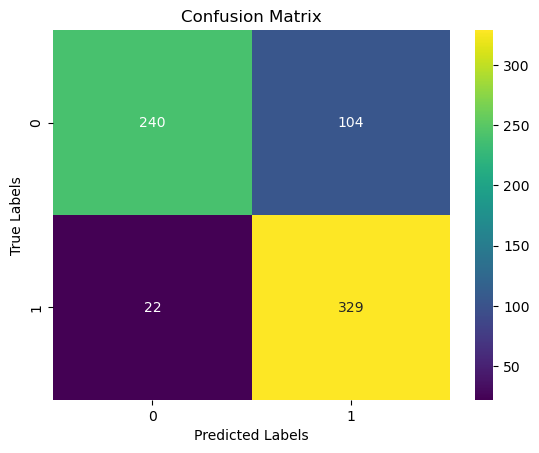

In [237]:
# Import library
from sklearn.metrics import confusion_matrix

# Melatih KNN model yang sudah dioptimasi
knn = KNeighborsClassifier(leaf_size=22, n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Membuat heatmap
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Dengan menggunakan hasil *hyperparameter tuning* untuk model KNN, kita melatih lagi model tersebut untuk mendapatkan **confusion matrix** seperti gambar di atas, dengan hasil yaitu:

- **True Positive**: Diprediksi keluar dan ternyata benar sebanyak 329
- **True Negative**: Diprediksi bertahan dan ternyata benar sebanyak 240
- **False Positive**: Diprediksi keluar dan ternyata salah sebanyak 104
- **False Negative**: Diprediksi bertahan dan ternyata  salah sebanyak 22

# 4. Feature Importance (30 poin)
Setelah mendapatkan model yang paling baik, lakukan **interpretasi** pada model dengan melihat **feature importance**-nya. Apa yang menyebabkan hasil prediksi model demikian.<br>

A. Evaluasi **feature yang paling penting**.<br>
B. Tarik **business insight**-nya.<br>
C. Berikan action items berupa **rekomendasi** terhadap insight tersebut.<br>

### 4.1. Feature Importance

Using 1621 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/695 [00:00<?, ?it/s]

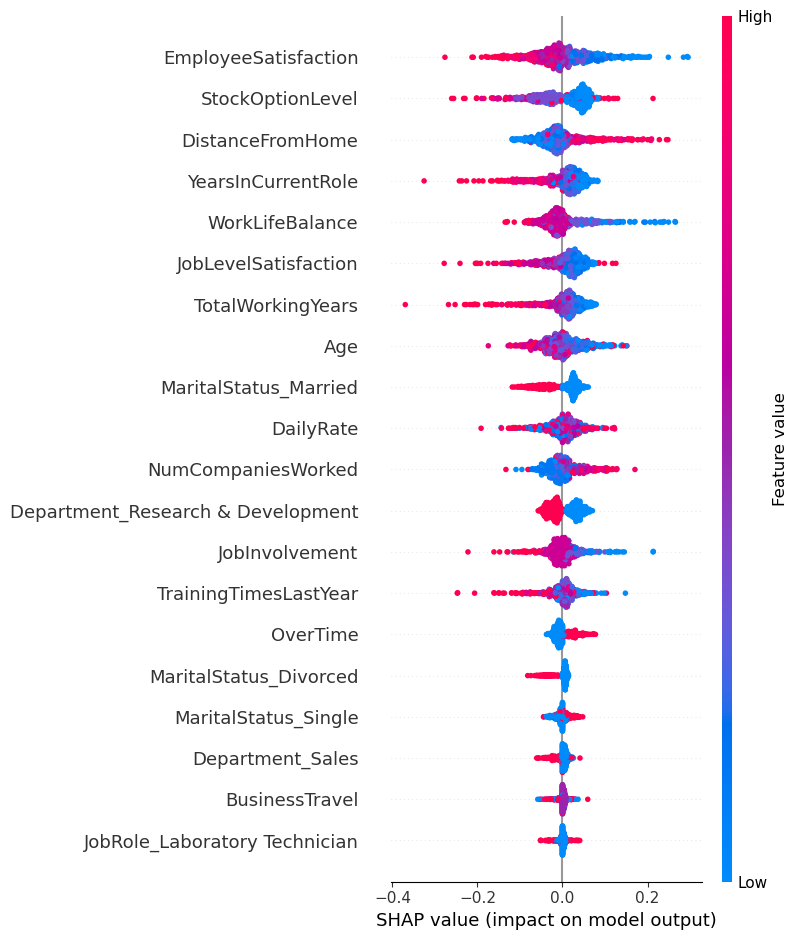

In [238]:
# Import library
import shap

# Melatih KNN model yang sudah dioptimasi
knn = KNeighborsClassifier(leaf_size=22, n_neighbors=10)
knn.fit(X_train, y_train)

# Inisialisasi SHAP explainer dengan KNN model
explainer = shap.KernelExplainer(knn.predict_proba, X_train)

# Menghitung SHAP values
shap_values = explainer.shap_values(X_test)

# Membuat summary plot
shap.summary_plot(shap_values[1], X_test)

### 4.2. Business Insight

Beberapa insight yang bisa didapatkan berdasarkan grafik **Shap Values** pada slide sebelumnya adalah :
1. Sepuluh fitur yang paling mempengaruhi tingkat attrition karyawan adalah `EmployeeSatisfaction`, `StockOptionLevel`, `DistanceFromHome`, `YearsInCurrentRole`, `WorkLifeBalance`, `JobLevelSatisfaction`, `TotalWorkingYears`, `Age`, `MaritaslStatus_Married`, and `DailyRate`.
2. **Semakin rendah** tingkat kepuasan seorang karyawan terhadap perusahaan semakin tinggi kemungkinan karyawan tersebut untuk keluar dari perusahaan.
3. **Semakin rendah** kompensasi seorang karyawan dalam bentuk ekuitas semakin tinggi kemungkinan karyawan tersebut untuk keluar dari perusahaan.
4. **Semakin jauh** jarak seorang karyawan dengan perusahaan semakin tinggi kemungkinan karyawan tersebut untuk keluar dari perusahaan.
5. **Semakin rendah** jumlah tahun seorang karyawan bekerja pada posisi yang sedang dikerjakan semakin tinggi kemungkinan karyawan tersebut untuk keluar dari perusahaan.
6. **Semakin rendah** tingkat *work life balance* dari seorang karyawan semakin tinggi kemungkinan karyawan tersebut untuk keluar dari perusahaan.
7. **Semakin rendah** tingkat kepuasan dari seorang karyawan terhadap level posisi pekerjaannya semakin tinggi kemungkinan karyawan tersebut untuk keluar dari perusahaan.
8. **Semakin rendah** pengalaman kerja dari seorang karyawan semakin tinggi kemungkinan karyawan tersebut untuk keluar dari perusahaan.
9. **Semakin rendah** muda umur seorang karyawan semakin tinggi kemungkinan karyawan tersebut untuk keluar dari perusahaan.
10. Karyawan dengan *marital status* menikah memiliki *attrition rate* yang **lebih rendah** jika dibandingkan dengan karyawan dengan marital status selain menikah.
11. **Semakin tinggi** *Daily Rate* maka semakin tinggi juga kemungkinan karyawan untuk keluar dari perusahaan.

### 4.3. Business Recommendation

1. Melakukan peninjauan kembali terhadap fasilitas yang sudah ada atau yang akan diberikan kepada masing-masing karyawan seperti **gaji** dan **insentif** untuk meningkatkan *job satisfaction*.
2. Menerapkan **positive culture** sebagai budaya perusahaan serta membuat sebuah kegiatan untuk meningkatkan *engagement* antar karyawan untuk meningkatkan *environment satisfaction* para karyawan.
3. Kami merekomendasikan karyawan diberikan prioritas dan kesempatan untuk terlibat dalam **pembelian saham** perusahaan.
4. Menerapkan **hybrid working** bagi karyawan yang memiliki rumah jauh dari kantor.
5. Kami merekomendasikan untuk memberikan fasilitas bagi karyawan untuk melakukan **self-development** atau **training**, serta pemberian **jenjang karir yang jelas** kepada karyawan muda atau yang baru masuk sehingga bisa meningkatkan *job level* dan lama seorang karyawan bekerja di suatu jabatan tertentu.
6. Melakukan **analisa beban kerja** masing-masing karyawan untuk meminimalisir jumlah karyawan yang bekerja diluar jam kerja reguler (*over time*) dengan memperhitungkan jumlah karyawan yang berada pada masing-masing departemen untuk meningkatkan *work-life balance* karyawan.